<h3 style="color: grey;"><i>CODSOFT TASK-2 (MOVIE RATING PREDICTION WITH PYTHON)</i></h3>

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping  
from sklearn.neural_network import MLPRegressor
import re

In [2]:
df=pd.read_csv('IMDb Movies India.csv', encoding="Latin1")

## Data Exploration 

In [3]:
df.shape

(15509, 10)

In [4]:
df=df.dropna()

In [5]:
df.shape

(5659, 10)

In [6]:
# Display general information about the dataframe
print('INFO:\n')
print(df.info(), '\n\n\n\n\n')

# Display a summary of the dataframe
print('Summary of the dataframe:\n', df.describe, '\n\n')

# Display the number of unique values in the 'Genre' column
print('nunique:\n', df['Genre'].nunique(), '\n\n\n')

# Display unique values in the 'Year' column
print('Unique Years:\n', df['Year'].unique(), '\n\n\n')

# Display unique values in the 'Rating' column
print('Unique Ratings:\n', df.Rating.unique(), '\n\n\n')

# Display unique values in the 'Duration' column
print('Unique Durations:\n', df['Duration'].unique(), '\n\n\n')

# Group by 'Genre' and display count
print("Groupby ['Genre']:\n", df.groupby(['Genre']).count(), '\n\n\n')

# Display top 6 Director counts using value_counts
print("Top 6 Directors:\n", df["Director"].value_counts().head(6), '\n\n\n')

# Display columns with any null values
print('isnull().any():\n', df.isnull().any(), '\n\n\n\n\n')


INFO:

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB
None 





Summary of the dataframe:
 <bound method NDFrame.describe of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (2005

In [7]:
df.Year.unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(2008)', '(1994)',
       '(2007)', '(2003)', '(1998)', '(1979)', '(1974)', '(2015)',
       '(2006)', '(1981)', '(2020)', '(1985)', '(2013)', '(2011)',
       '(1988)', '(1987)', '(1999)', '(1973)', '(1968)', '(1982)',
       '(1977)', '(1950)', '(1969)', '(1948)', '(1990)', '(1989)',
       '(2001)', '(2000)', '(1953)', '(1978)', '(1963)', '(1992)',
       '(1976)', '(1984)', '(1986)', '(1966)', '(1975)', '(1980)',
       '(1967)', '(1970)', '(1952)', '(1972)', '(1971)', '(1964)',
       '(1954)', '(1962)', '(1957)', '(1965)', '(1996)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1947)',
       '(1931)', '(1933)', '(1943)', '(1944)', '(1932)', '(193

In [8]:
df.Rating.unique() 

array([ 7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,  6.3,
        7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  4.5,  6.4,  4.1,  4.8,  8.1,
        5.5,  6.8,  5. ,  6.1,  7.7,  5.1,  3.3,  7.8,  8.4,  4.3,  5.8,
        7.5,  3.6,  4.6,  4.2,  5.3,  5.4,  3. ,  8. ,  6. ,  3.1,  3.8,
        7.9,  2.7,  2.4,  7.6,  6.7,  3.4,  5.2,  4.9,  2.8,  3.7,  3.9,
        3.2,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,  2.5,  2.3,  8.5,
        8.6,  2.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.4,  9.7,  1.8,  9.2,
        2. ,  9.1, 10. ,  1.6,  2.2,  1.1])

## Data cleaning

In [9]:
# Convert 'Duration' to numeric after removing 'min'
df['Duration'] = pd.to_numeric(df['Duration'].str.replace('min', ''), errors='coerce')

# Handle special cases in 'Votes' column more dynamically
df["Votes"] = pd.to_numeric(df['Votes'].replace('[\$,M]', '', regex=True), errors='coerce')

# Dropping null values
df.dropna(subset=['Year', 'Genre'], inplace=True)

# Replace null values with mean or mode dynamically
df['Rating'].fillna(df['Rating'].mode().max(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)

# Drop remaining null values in specified columns
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)


<i> <h3> cross check the data cleaning process </h3> </i>

In [10]:
# Print count and percentage of null values in the 'Year' column
year_nullcount = df['Year'].isnull().sum()
year_nullpercentage = (year_nullcount / len(df['Year'])) * 100
print(f'Null Values in Year Column: Count = {year_nullcount}, Percentage = {year_nullpercentage:.2f}%')

# Print count and percentage of null values in the 'Genre' column
genre_nullcount = df['Genre'].isnull().sum()
genre_nullpercentage = (genre_nullcount / len(df['Genre'])) * 100
print(f'Null Values in Genre Column: Count = {genre_nullcount}, Percentage = {genre_nullpercentage:.2f}%')


Null Values in Year Column: Count = 0, Percentage = 0.00%
Null Values in Genre Column: Count = 0, Percentage = 0.00%


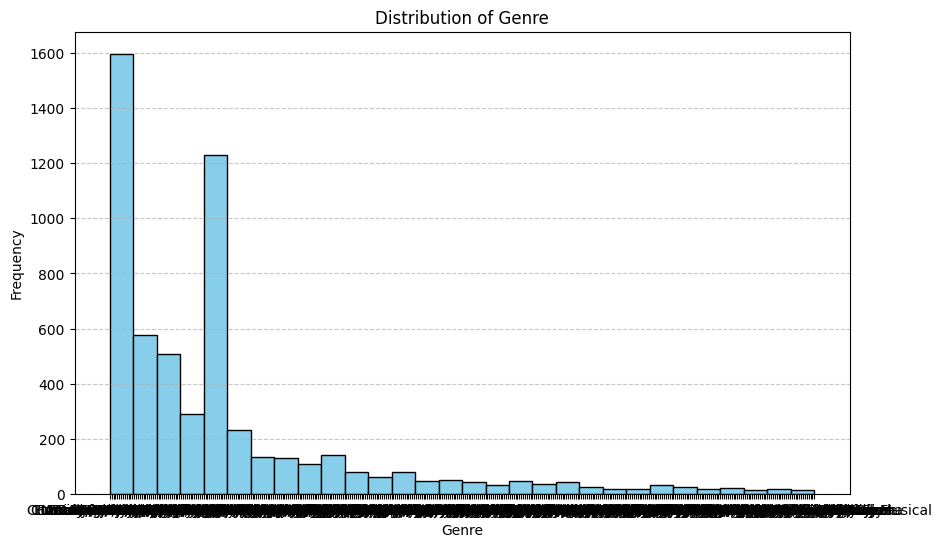

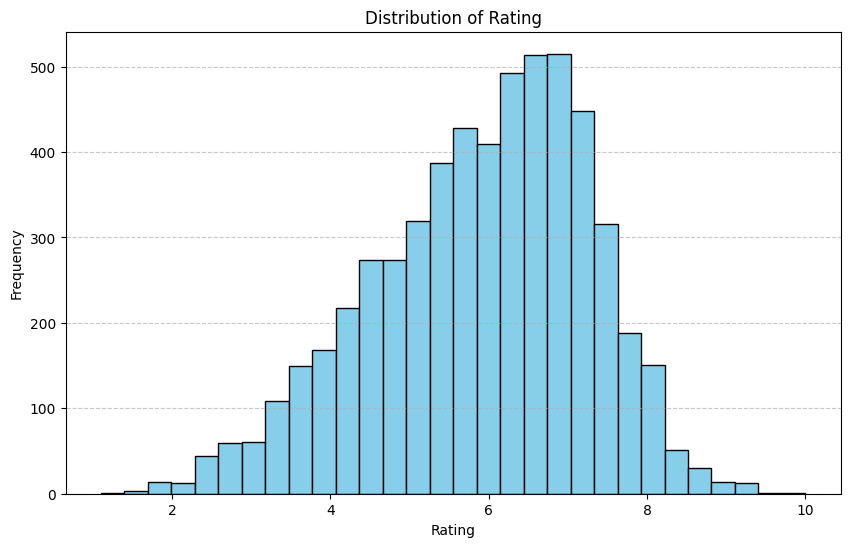

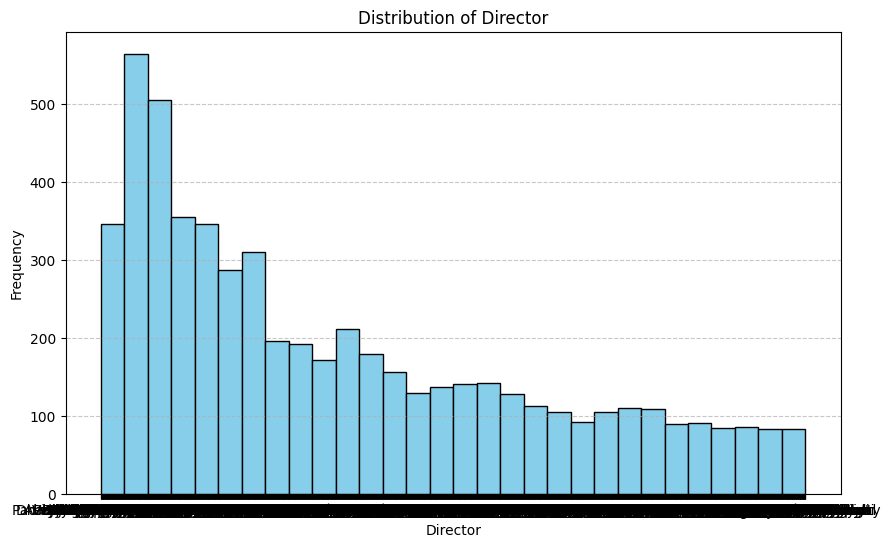

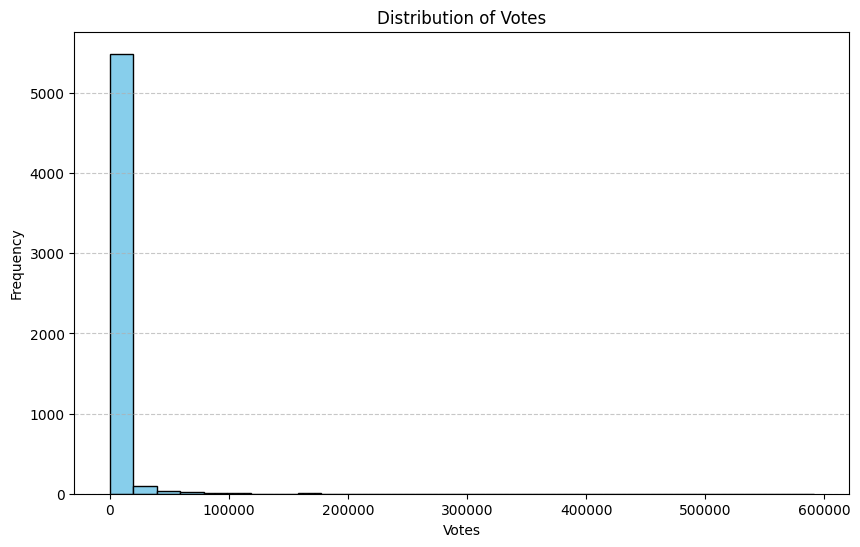

In [11]:
import matplotlib.pyplot as plt

def visualize_distribution(data, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_name], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

visualize_distribution(df, 'Genre')
visualize_distribution(df, 'Rating') 
visualize_distribution(df, 'Director') 
visualize_distribution(df, 'Votes') 


/var/folders/v6/wwl3k6c95xld1qk3n2323v1w0000gn/T/ipykernel_3211/3233538021.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_column, y=y_column, hue=hue, data=data, palette=palette)


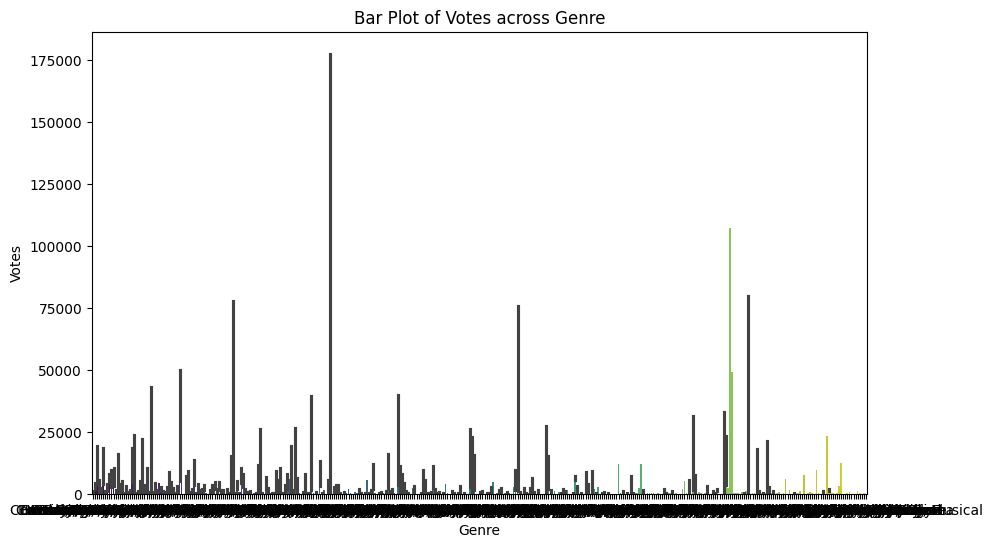

/var/folders/v6/wwl3k6c95xld1qk3n2323v1w0000gn/T/ipykernel_3211/3233538021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_column, data=data, palette=palette)


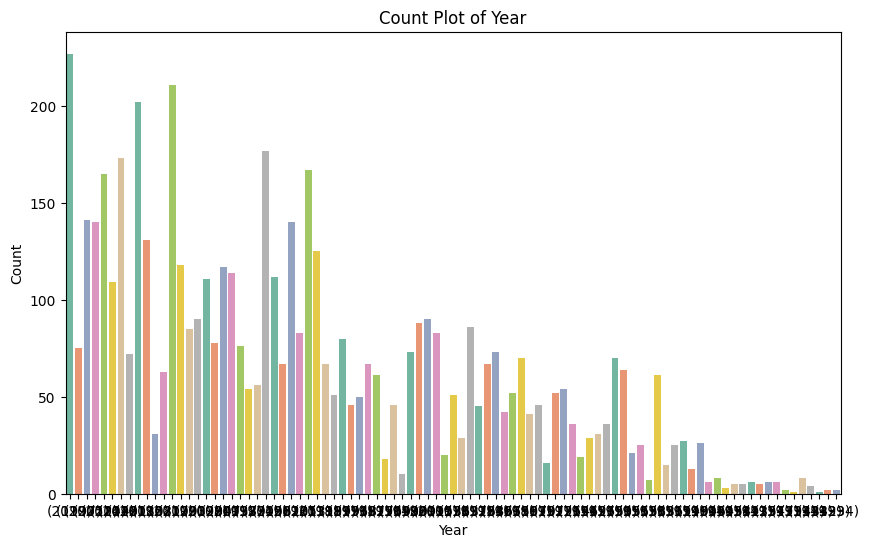

/var/folders/v6/wwl3k6c95xld1qk3n2323v1w0000gn/T/ipykernel_3211/3233538021.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x_column, y=y_column, data=data, palette=palette)


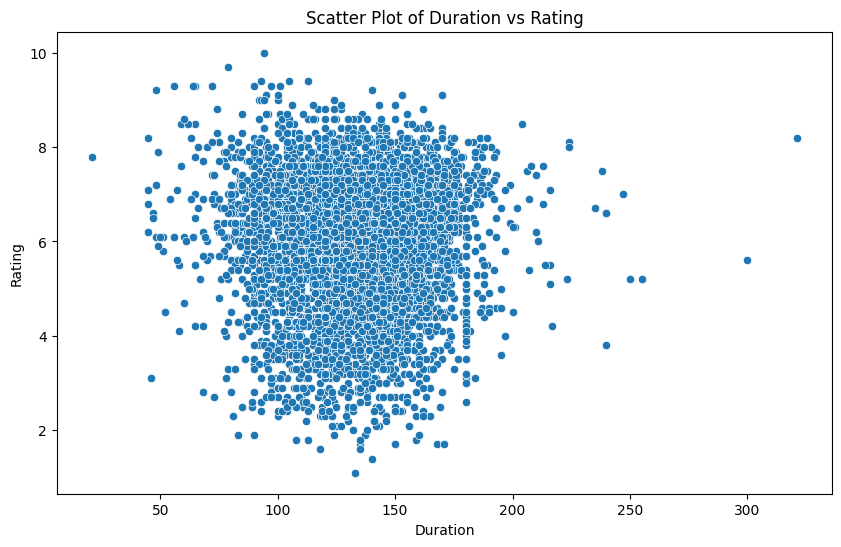

In [12]:

def visualize_data_bar(data, x_column, y_column=None, kind='bar', palette='viridis', figsize=(10, 6),hue=None):
   
    plt.figure(figsize=figsize)
    if kind == 'bar':
        sns.barplot(x=x_column, y=y_column, hue=hue, data=data, palette=palette)
        plt.title(f'Bar Plot of {y_column} across {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)

    elif kind == 'countplot':
        sns.countplot(x=x_column, data=data, palette=palette)
        plt.title(f'Count Plot of {x_column}')
        plt.xlabel(x_column)
        plt.ylabel('Count')

    elif kind == 'scatter':
        sns.scatterplot(x=x_column, y=y_column, data=data, palette=palette)
        plt.title(f'Scatter Plot of {x_column} vs {y_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
    plt.show()
visualize_data_bar(df, x_column='Genre', y_column='Votes', kind='bar', palette='viridis')
visualize_data_bar(df, x_column='Year', kind='countplot', palette='Set2')
visualize_data_bar(df, x_column='Duration', y_column='Rating', kind='scatter', palette='Blues')


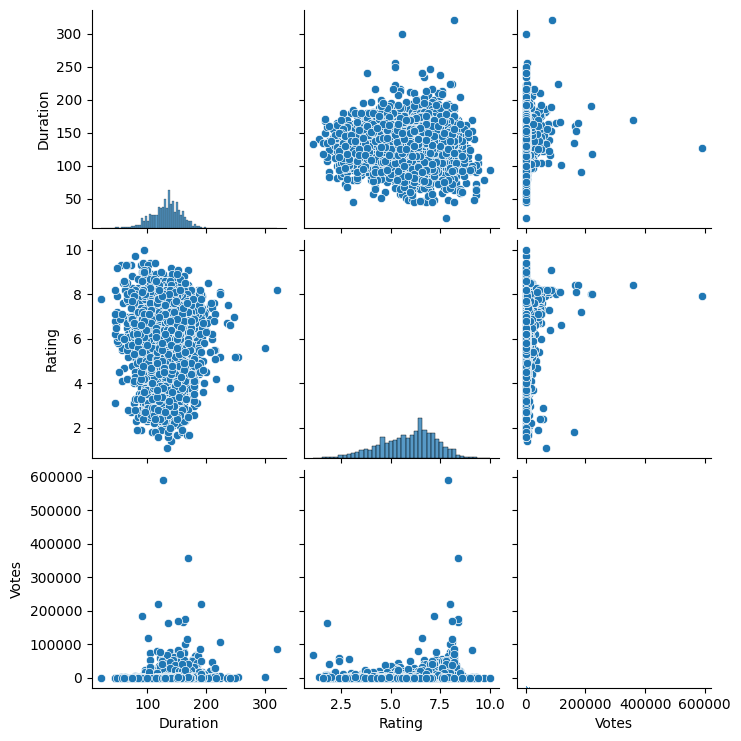

In [13]:
sns.pairplot(df)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')

#### BUILD A MODEL FOR REGRESSION OF RATING OF MOVIES USING Neural Network

In [14]:

# Extracting the numeric part from the 'Year' column
df['Year'] = df['Year'].str.extract('(\d+)').astype(float) 

# Encoding categorical variables based on mean ratings
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']

df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map), 1)

# Drop original categorical columns
df.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)



In [15]:
X = df[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = df['Rating']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f"Linear Regression RMSE: {mean_squared_error(y_test, lr_pred, squared=False)}")

# Model Building - Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest RMSE: {mean_squared_error(y_test, rf_pred, squared=False)}")

# Model Building - Neural Network
# Using a simple Multi-layer Perceptron (MLP) regressor with one hidden layer
nn = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
print(f"Neural Network RMSE: {mean_squared_error(y_test, nn_pred, squared=False)}")


Linear Regression RMSE: 0.6510872609706446
Random Forest RMSE: 0.5812955214136332
Neural Network RMSE: 0.5729478808134688


In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

# Print Linear Regression Metrics
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

# Model Building - Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Print Random Forest Regressor Metrics
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

# Print Neural Network Metrics
print('\nNeural Network Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, nn_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, nn_pred))
print('R2 Score:', r2_score(y_test, nn_pred))

Linear Regression Metrics:
Mean Squared Error: 0.4239146213982563
Mean Absolute Error: 0.4826774612067777
R2 Score: 0.771072727975098

Random Forest Regressor Metrics:
Mean Squared Error: 0.3355942544169611
Mean Absolute Error: 0.40170494699646647
R2 Score: 0.8187685130616685

Neural Network Metrics:
Mean Squared Error: 0.3282692741286448
Mean Absolute Error: 0.41027306174255035
R2 Score: 0.8227242335544162
